In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
# Prepare data
x_numpy, y_numpy = datasets.make_regression(n_samples =100, n_features = 1, noise =20, random_state = 1)

In [4]:
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [5]:
y = y.view(y.shape[0],1)

In [6]:
n_samples, n_features = x.shape

In [7]:
# Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [8]:
# Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [9]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss 
    y_predicted = model(x)
    loss = criterion(y_predicted,y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+ 1)% 10==0:
        print(f"epoch: {epoch+1}, loss: {loss.item():.4f}")

epoch: 10, loss: 4436.8755
epoch: 20, loss: 3307.0935
epoch: 30, loss: 2490.3438
epoch: 40, loss: 1899.2262
epoch: 50, loss: 1470.9608
epoch: 60, loss: 1160.3810
epoch: 70, loss: 934.9448
epoch: 80, loss: 771.1756
epoch: 90, loss: 652.1140
epoch: 100, loss: 565.4942


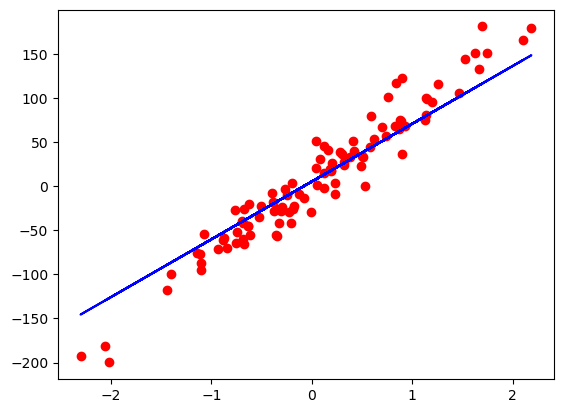

In [11]:
# Plot
predicted = model(x).detach().numpy()
plt.plot(x_numpy,y_numpy, "ro")
plt.plot(x_numpy,predicted, "b")
plt.show()